**0.0-test.ipynb** for testing your `lvv-ri` environment

Copyright (c) 2019, Arvid Lundervold

# python, numpy, pandas, matplotlib, rpy2 and more

If you successfully run through this notebook, then your Python environment is configured correctly. 

# How to use the Jupyter Notebook?

[Jupyter Notebook](http://jupyter.org/) is a useful tool for experimenting with code. Everything of code and text is written in HTML, Markdown and Python.

Use arrow keys to navigate between cells. Hit ENTER on a cell to switch to editing mode. ESC to get back.

In [1]:
print("This is a Jupyter cell containing Python code. Hit 'Run' in the menu to execute the cell. ")

This is a Jupyter cell containing Python code. Hit 'Run' in the menu to execute the cell. 


You can also run cells by typing **Shift+Enter** or **Ctrl+Enter**. Try running the cell above by using both of these.

You will find more information via the Help menu above.

`lvv-ri` is using Jupyter Notebooks with both Python and R for the coding. <br>Here is a good tutorial on Jupyter Notebook: [Jupyter Notebook Tutorial: The Definitive Guide](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook).

# Import libraries

These are libaries that will be frequently used in the course:

In [21]:
# To diosplay plots directly in the notebook:
%matplotlib inline

In [22]:
# A frequently used plotting libraryp:
import matplotlib
import matplotlib.pyplot as plt

In [23]:
# An extension of matplotlib making it easy to generate even nicer plots:
import seaborn as sns

In [24]:
# A numerical libray for efficient manipulation of matrices (and more):
import numpy as np

In [27]:
# To read, write and proecess tabular data:
import pandas as pd

In [26]:
# For machine learning:
import sklearn

In [1]:
# For rpy2:
import tzlocal

In [2]:
# For using R:
import rpy2
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()
from rpy2.robjects.lib.tidyr import DataFrame

/Users/arvid/anaconda3/envs/lvv-ri/lib/python3.7/site-packages/rpy2/robjects/lib/tidyr.py:10: UserWarning: This was designed againt tidyr version 0.7.2 but you have 0.8.3
  warnings.warn('This was designed againt tidyr version %s but you have %s' % (TARGET_VERSION, tidyr.__version__))
/Users/arvid/anaconda3/envs/lvv-ri/lib/python3.7/site-packages/rpy2/robjects/lib/dplyr.py:24: UserWarning: This was designed againt dplyr version 0.7.5 but you have 0.7.6
  warnings.warn('This was designed againt dplyr version %s but you have %s' % (TARGET_VERSION, dplyr.__version__))


If errors like<br>
```python
RRuntimeError: Error in loadNamespace(name) : there is no package called 'tidyr'
```
see cell below:

In [3]:
from rpy2.robjects.packages import importr
utils = importr('utils')
# If needed to install - uncomment the following
#utils.install_packages('tidyr')
#utils.install_packages('lazyeval')
#utils.install_packages('lme4')
#utils.install_packages('ggplot2')
#utils.install_packages('GGally')
#utils.install_packages('foreign')

# Extra:
#utils.install_packages('caret')
#utils.install_packages('tidyverse')
#utils.install_packages('devtools')
#utils.install_packages('rlang')
#utils.install_packages('Rccp')
#utils.install_packages('tikzDevice')
#utils.install_packages('stargazer')
#utils.install_packages('readxl')
#utils.install_packages('stringi')
#utils.install_packages('r-cran-stringi')
#utils.install_packages('foreign')

In [4]:
%reload_ext rpy2.ipython

In [5]:
%R R.version$system

array(['x86_64, darwin13.4.0'], dtype='<U20')

In [6]:
%R R.version$version.str

array(['R version 3.5.1 (2018-07-02)'], dtype='<U28')

In [7]:
%R library(foreign); #library(readxl)

# Test libraries

**REMARK:**  The aim of the following is to test the installation, not doing relevant `lvv-ri`analysis.

## `Numpy`

In [4]:
import numpy as np

In [5]:
a = np.array([1, 2, 3])
print(type(a))

<class 'numpy.ndarray'>


In [6]:
e = np.random.random((3,3))
e

array([[0.42295248, 0.76041083, 0.96947872],
       [0.66270009, 0.70824548, 0.42115144],
       [0.69589176, 0.44898662, 0.58608437]])

## `matplotlib`: a simple plot

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

The following will give a figure displaying a sine function:

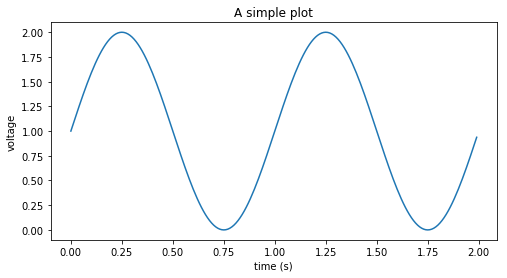

In [8]:
# Data to be plotted (generated by Numpy)
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

# Make a figure of given size
f, ax = plt.subplots(figsize=(8,4))

# Plot t versus s
plt.plot(t, s)

# Add a title and labels:
plt.title('A simple plot')
plt.xlabel('time (s)')
plt.ylabel('voltage')

# Show plot:
plt.show()

## `Seaborn`: a more advanced plot

In [12]:
import seaborn as sns

Source: [Link](https://seaborn.pydata.org/examples/scatterplot_categorical.html)

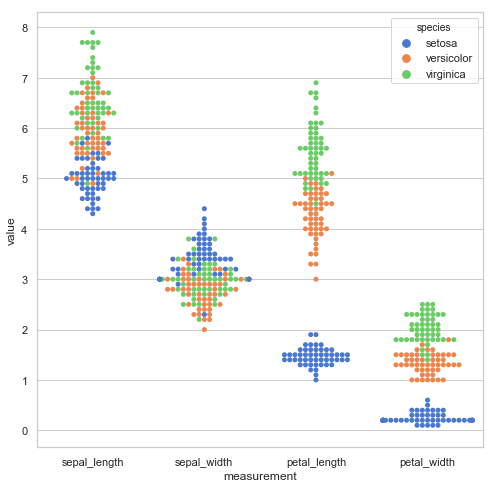

In [13]:
sns.set(style="whitegrid", palette="muted")

# Load the iris dataset
iris = sns.load_dataset("iris")

# "Melt" dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Make a figure with given size
f, ax = plt.subplots(figsize=(8,8))

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species", data=iris, size=5, ax=ax)

plt.show()

## `Pandas`

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('../data/lvv_ri_data.csv')

In [16]:
df.head()

,Subject,Sex,AcquisitionYearsW1,AcquisitionYearsW2,AcquisitionYearsW3,Left-Lateral-Ventricle_W1,Left-Lateral-Ventricle_W2,Left-Lateral-Ventricle_W3,Right-Lateral-Ventricle_W1,Right-Lateral-Ventricle_W2,Right-Lateral-Ventricle_W3,EstimatedTotalIntraCranialVol_W3,Stroop_3_R_W3
0,subj_01,F,56.63,60.35,62.62,5321.4,5063.6,5368.3,6855.2,6729.2,7233.2,1.232679e+06,66.0
1,subj_02,M,49.07,52.58,55.05,11038.6,11912.2,12313.3,10611.6,11774.8,12070.5,1.464692e+06,85.0
2,subj_03,M,74.61,78.14,80.59,29718.4,32265.1,35887.0,34241.0,37155.2,41221.4,1.385841e+06,71.0
3,subj_04,M,56.23,59.78,62.68,21830.1,23933.6,26164.2,15243.9,16505.1,18509.1,1.529445e+06,41.0
4,subj_05,M,63.22,67.00,69.53,17205.1,16970.1,15858.1,13962.1,13755.5,13143.9,1.371460e+06,62.0


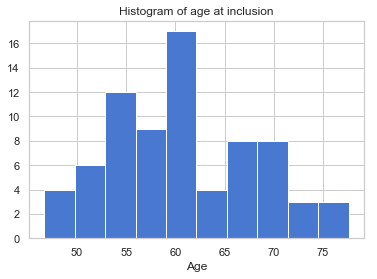

In [17]:
df['AcquisitionYearsW1'].hist()
plt.title("Histogram of age at inclusion")
plt.xlabel("Age")
plt.show()

## `scikit-learn`: machine learning

In [18]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [19]:
data = datasets.load_breast_cancer()

In [20]:
X = data['data']
y = data['target']
features = data['feature_names']
labels = data['target_names']

In [21]:
print(features)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [22]:
print(labels)

['malignant' 'benign']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
rf = RandomForestClassifier(n_estimators=100)

In [25]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
predictions = rf.predict(X_test)

In [27]:
accuracy_score(y_test, predictions) * 100

90.9090909090909

## `rpy2`, `lmer` and `ggplot`: Analysis in R

In [8]:
%%R

# library(foreign)

Rdf <- read.csv(file="../data/lvv_ri_data.csv",head=TRUE, sep=",")

In [9]:
%R names(Rdf)

array(['Subject', 'Sex', 'AcquisitionYearsW1', 'AcquisitionYearsW2',
       'AcquisitionYearsW3', 'Left.Lateral.Ventricle_W1',
       'Left.Lateral.Ventricle_W2', 'Left.Lateral.Ventricle_W3',
       'Right.Lateral.Ventricle_W1', 'Right.Lateral.Ventricle_W2',
       'Right.Lateral.Ventricle_W3', 'EstimatedTotalIntraCranialVol_W3',
       'Stroop_3_R_W3'], dtype='<U32')

In [10]:
%R dim(Rdf)

array([74, 13], dtype=int32)

In [11]:
%R Rdf$Stroop_3_R_W3

array([ 66.,  85.,  71.,  41.,  62.,  89.,  46.,  57.,  48.,  50.,  59.,
        56.,  40.,  51.,  57.,  54.,  52.,  78.,  54.,  53.,  47.,  46.,
        45.,  41.,  57.,  71.,  73.,  41.,  57.,  56., 102.,  78.,  68.,
        60.,  48.,  39.,  41.,  55.,  55.,  57.,  42.,  44.,  55.,  51.,
        51.,  50.,  44.,  66.,  65.,  63.,  59.,  60.,  54.,  41.,  94.,
        78.,  49.,  80.,  51.,  42.,  88.,  58.,  83.,  60.,  51.,  45.,
        44.,  45.,  50.,  35.,  42.,  42.,  55.,  74.])

In [12]:
%R mean(Rdf$Left.Lateral.Ventricle_W1)

array([14994.0972973])

In [13]:
%R sd(Rdf$Left.Lateral.Ventricle_W1)

array([8584.6772172])

In [14]:
%R min(Rdf$AcquisitionYearsW1)

array([46.66])

In [15]:
%R max(Rdf$AcquisitionYearsW1)

array([77.63])

In [16]:
%%R

RdfS <- na.omit(Rdf, select=c(Subject, Stroop_3_R_W3, Left.Lateral.Ventricle_W1, Left.Lateral.Ventricle_W2, Left.Lateral.Ventricle_W3))
RfitLVV <- lm(Stroop_3_R_W3 ~ Left.Lateral.Ventricle_W1 + Left.Lateral.Ventricle_W2 + Left.Lateral.Ventricle_W3, data=RdfS)

In [17]:
%R names(RfitLVV)

array(['coefficients', 'residuals', 'effects', 'rank', 'fitted.values',
       'assign', 'qr', 'df.residual', 'xlevels', 'call', 'terms', 'model'],
      dtype='<U13')

In [18]:
%R head(RfitLVV)

R object with classes: ('list',) mapped to:
<ListVector - Python:0x12b818348 / R:0x7f8c9ed255d8>
[Float..., Float..., Float..., IntVe..., Float..., IntVe...]
  coefficients: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x12b81e508 / R:0x7f8c9faa0608>
[52.349909, 0.001122, -0.007949, 0.006735]
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x12bb9cac8 / R:0x7f8c9db61b40>
[11.773199, 32.021743, 0.073029, -21.817724, ..., -11.487475, -12.203326, -1.590332, 11.706603]
  effects: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x12bbb77c8 / R:0x7f8c9db61dc0>
[-490.216293, 23.385087, 4.041654, -52.526447, ..., -14.886548, -15.719566, -3.260121, 12.650482]
  rank: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x12bbb7108 / R:0x7f8c9fad78b0>
[4]
  fitted.values: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x12b7f1d08 / R:0x7f8c9dabbec0>
[54.226801, 52.978257, 70.926971, 62.817724, ..., 53.487475, 54.203326, 56.590332, 62.293397]
  assign: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x12b856888 / R:0x7f8c9fa9b648>
[0, 1, 2, 3]

In [19]:
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

pd_RfitLVV = r['RfitLVV']

temp = pandas2ri.ri2py(pd_RfitLVV)
print(temp[0])
#print(temp[1])
#print(temp[2])
print(temp[3])
#print(temp[4])
#print(temp[5])
#print(temp[6])
#print(temp[7])
#print(temp[8])

              (Intercept) Left.Lateral.Ventricle_W1 Left.Lateral.Ventricle_W2 
             52.349908701               0.001121977              -0.007949177 
Left.Lateral.Ventricle_W3 
              0.006735438 

[1] 4



In [20]:
print(pd_RfitLVV.names)
print(pandas2ri.ri2py(pd_RfitLVV.names))

 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        

['coefficients' 'residuals' 'effects' 'rank' 'fitted.values' 'assign' 'qr'
 'df.residual' 'xlevels' 'call' 'terms' 'model']


In [21]:
%R summary(RfitLVV)

R object with classes: ('summary.lm',) mapped to:
<ListVector - Python:0x12bd08488 / R:0x7f8c97f52248>
[Vector, Formula, FloatVector, Matrix, ..., FloatVector, FloatVector, FloatVector, Matrix]
  call: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('lm',) mapped to:
<Vector - Python:0x12b88f388 / R:0x7f8c9f9e3050>
[RObject, Vector, RObject]
  terms: <class 'rpy2.robjects.Formula'>
  R object with classes: ('terms', 'formula') mapped to:
<Formula - Python:0x12b7f1a08 / R:0x7f8c9fa66f20>
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x12bc1f248 / R:0x7f8c9db61b40>
[11.773199, 32.021743, 0.073029, -21.817724, ..., -11.487475, -12.203326, -1.590332, 11.706603]
  coefficients: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x12b85aa08 / R:0x7f8c97f525b8>
[52.349909, 0.001122, -0.007949, 0.006735, ..., 0.000000, 0.426450, 0.001510, 0.000144]
...
  sigma: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x12b80f3c8 / R:0x7f8c9f4b0d70>
[0.217580]
  df: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x12b82fbc8 / R:0x7f8c9f4b0d38>
[0.184048]
  r.squared: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x12b80fc48 / R:0x7f8c9a060bc8>
[6.488669, 3.000000, 70.000000]
  adj.r.squared: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x12b80f988 / R:0x7f8c97f520e8>
[0.055522, -0.000004, 0.000001, 0.000000, ..., 0.000000, 0.000000, -0.000000, 0.000000]

In [22]:
%R anova(RfitLVV)

/Users/arvid/anaconda3/envs/lvv-ri/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
0,1,546.862290,546.862290,3.204246,0.077772
1,1,16.334967,16.334967,0.095712,0.757956
2,1,2759.027640,2759.027640,16.166049,0.000144
3,70,11946.761588,170.668023,NaN,NaN


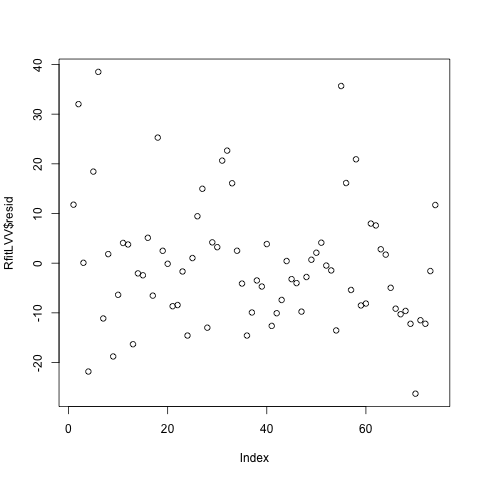

In [23]:
%R plot(RfitLVV$resid)

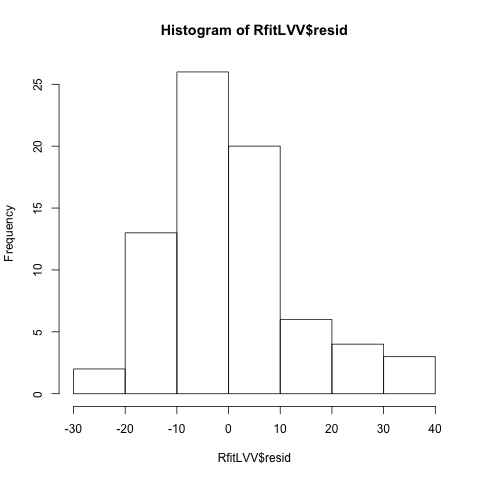

R object with classes: ('histogram',) mapped to:
<ListVector - Python:0x12b814e48 / R:0x7f8ca00eb9e8>
[Float..., IntVe..., Float..., Float..., StrVe..., BoolV...]
  breaks: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x12bbb7108 / R:0x7f8ca00ec318>
[-30.000000, -20.000000, -10.000000, 0.000000, 10.000000, 20.000000, 30.000000, 40.000000]
  counts: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x12b814d88 / R:0x7f8ca00f0068>
[2, 13, 26, 20, 6, 4, 3]
  density: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x12b80f348 / R:0x7f8ca00ebdd8>
[0.002703, 0.017568, 0.035135, 0.027027, 0.008108, 0.005405, 0.004054]
  mids: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x12bb99d48 / R:0x7f8ca00ebc18>
[-25.000000, -15.000000, -5.000000, 5.000000, 15.000000, 25.000000, 35.000000]
  xname: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x12bb99e08 / R:0x7f8ca00e9c88>
['RfitLVV$resid']
  equidist: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x12bb99508 / R:0x7f8c9b8088e0>
[       1]

In [24]:
%R hist(RfitLVV$resid)


A group of diagnostic plots (residual, qq, scale-location, leverage) to assess model performance when applied to a fitted linear regression model.

https://data.library.virginia.edu/diagnostic-plots/

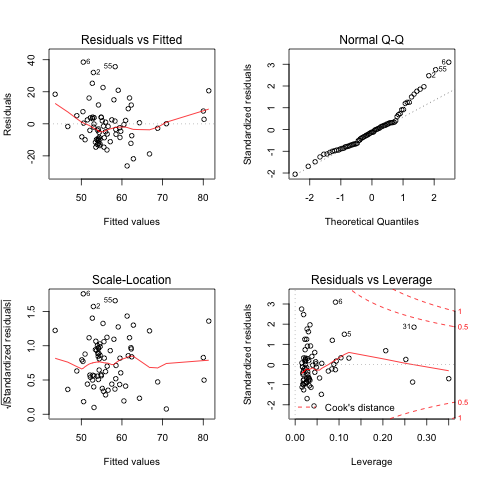

In [25]:
%R par(mfrow=c(2,2));  plot(RfitLVV)  # Plot four panels on the same figure

In [28]:
df = pd.read_csv('../data/lvv_ri_data.csv')
df.head(7).T

,0,1,2,3,4,5,6
Subject,subj_01,subj_02,subj_03,subj_04,subj_05,subj_06,subj_07
Sex,F,M,M,M,M,F,M
AcquisitionYearsW1,56.63,49.07,74.61,56.23,63.22,60.51,58.87
AcquisitionYearsW2,60.35,52.58,78.14,59.78,67,64.29,62.42
AcquisitionYearsW3,62.62,55.05,80.59,62.68,69.53,66.82,64.87
Left-Lateral-Ventricle_W1,5321.4,11038.6,29718.4,21830.1,17205.1,14800.4,19864.5
Left-Lateral-Ventricle_W2,5063.6,11912.2,32265.1,23933.6,16970.1,18814.5,20962.8
Left-Lateral-Ventricle_W3,5368.3,12313.3,35887,26164.2,15858.1,19464.2,22141.1
Right-Lateral-Ventricle_W1,6855.2,10611.6,34241,15243.9,13962.1,12281.2,12133.7
Right-Lateral-Ventricle_W2,6729.2,11774.8,37155.2,16505.1,13755.5,16135.2,13055.5


Reading a Pandas dataframe (df) into R (data)

In [29]:
%%R -i df

data = df

In [30]:
%R names(data)

array(['Subject', 'Sex', 'AcquisitionYearsW1', 'AcquisitionYearsW2',
       'AcquisitionYearsW3', 'Left.Lateral.Ventricle_W1',
       'Left.Lateral.Ventricle_W2', 'Left.Lateral.Ventricle_W3',
       'Right.Lateral.Ventricle_W1', 'Right.Lateral.Ventricle_W2',
       'Right.Lateral.Ventricle_W3', 'EstimatedTotalIntraCranialVol_W3',
       'Stroop_3_R_W3'], dtype='<U32')

/Users/arvid/anaconda3/envs/lvv-ri/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘GGally’


  warnings.warn(x, RRuntimeWarning)
/Users/arvid/anaconda3/envs/lvv-ri/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following object is masked from ‘package:dplyr’:

    nasa


  warnings.warn(x, RRuntimeWarning)
/Users/arvid/anaconda3/envs/lvv-ri/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
  warnings.warn(x, RRuntimeWarning)
/Users/arvid/anaconda3/envs/lvv-ri/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [1,1] [>-------------------------------------------------]  3% est: 0s 
  warnings.warn(x, RRuntimeWarning)
/Users/arvid/anaconda3/envs/lvv-ri/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [1,2] [==>-----------------------------------------------]  6% est: 3s 
  warnings.warn(x, RRuntimeWarning)


/Users/arvid/anaconda3/envs/lvv-ri/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [6,6] [==================================================]100% est: 0s 
  warnings.warn(x, RRuntimeWarning)
                                                                              
  warnings.warn(x, RRuntimeWarning)


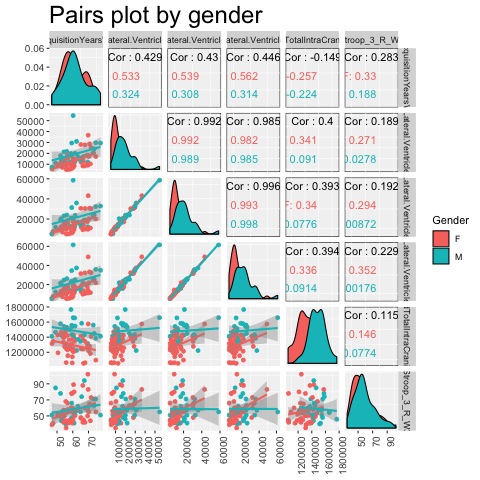

In [31]:
%%R -i df

library(ggplot2)
library(GGally)

data = df
data$Gender = data$Sex

pm <- ggpairs(
    data, mapping = aes(color = Gender), 
    title = "Pairs plot by gender",
    legend = 1,
    columns = c('AcquisitionYearsW1',
                'Left.Lateral.Ventricle_W1',
                'Left.Lateral.Ventricle_W2', 
                'Left.Lateral.Ventricle_W3', 
                'EstimatedTotalIntraCranialVol_W3', 
                'Stroop_3_R_W3'),
  lower = list(
    continuous = 'smooth'
  ))   


pm = pm + theme(axis.text.x = element_text(angle = 90, hjust = 1))

pm = pm + theme(
  axis.text = element_text(size = 10),
  axis.title = element_text(size = 10),
  legend.background = element_rect(fill = "white"),
  panel.grid.major = element_line(colour = NA),
#  panel.grid.minor = element_blank(),
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid', colour = "white"),
  panel.background = element_rect(fill = "grey95"),
  plot.title = element_text(size=24)
)

print(pm)

Converting the R dataframes to Pandas DataFrames using `rpy2` <br>

In [32]:
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

pd_data = r['data']

In [33]:
pd_data.head().T

,0,1,2,3,4
Subject,subj_01,subj_02,subj_03,subj_04,subj_05
Sex,F,M,M,M,M
AcquisitionYearsW1,56.63,49.07,74.61,56.23,63.22
AcquisitionYearsW2,60.35,52.58,78.14,59.78,67
AcquisitionYearsW3,62.62,55.05,80.59,62.68,69.53
Left.Lateral.Ventricle_W1,5321.4,11038.6,29718.4,21830.1,17205.1
Left.Lateral.Ventricle_W2,5063.6,11912.2,32265.1,23933.6,16970.1
Left.Lateral.Ventricle_W3,5368.3,12313.3,35887,26164.2,15858.1
Right.Lateral.Ventricle_W1,6855.2,10611.6,34241,15243.9,13962.1
Right.Lateral.Ventricle_W2,6729.2,11774.8,37155.2,16505.1,13755.5


LME example uning `lmer` from `lme4` and the ChickWeight data https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/ChickWeight.html

In [34]:
%%R

library(lme4)

data = ChickWeight

/Users/arvid/anaconda3/envs/lvv-ri/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: Matrix

  warnings.warn(x, RRuntimeWarning)
/Users/arvid/anaconda3/envs/lvv-ri/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘Matrix’


  warnings.warn(x, RRuntimeWarning)
/Users/arvid/anaconda3/envs/lvv-ri/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following object is masked from ‘package:tidyr’:

    expand


  warnings.warn(x, RRuntimeWarning)


In [35]:
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

pd_data = r['data']

In [36]:
pd_data.names

'weight','Time','Chick','Diet'


In [37]:
import rpy2.ipython.html
rpy2.ipython.html.init_printing()

print(pd_data.head(12))

Grouped Data: weight ~ Time | Chick
   weight Time Chick Diet
1      42    0     1    1
2      51    2     1    1
3      59    4     1    1
4      64    6     1    1
5      76    8     1    1
6      93   10     1    1
7     106   12     1    1
8     125   14     1    1
9     149   16     1    1
10    171   18     1    1
11    199   20     1    1
12    205   21     1    1



##### Now using https://stackoverflow.com/questions/35757994/converting-lme4-ranef-output-to-data-frame-with-rpy2

In [38]:
%reload_ext rpy2.ipython
%Rpush pd_data

In [39]:
%%R

library(lme4)

m <- lmer(weight ~ Time * Diet + (1 + Time | Chick), data=pd_data, REML=F)

rfs <- ranef(m)$cat
ffs <- fixef(m) 

print(names(ffs))

[1] "(Intercept)" "Time"        "Diet2"       "Diet3"       "Diet4"      
[6] "Time:Diet2"  "Time:Diet3"  "Time:Diet4" 


In [40]:
%Rpull ffs

In [41]:
print(ffs[0])
print(ffs[1])
print(ffs[2])
print(ffs[3])

33.65409623578436
6.279864028362544
-5.020500713172012
-15.403771020235581


In [42]:
#%R summary(m)

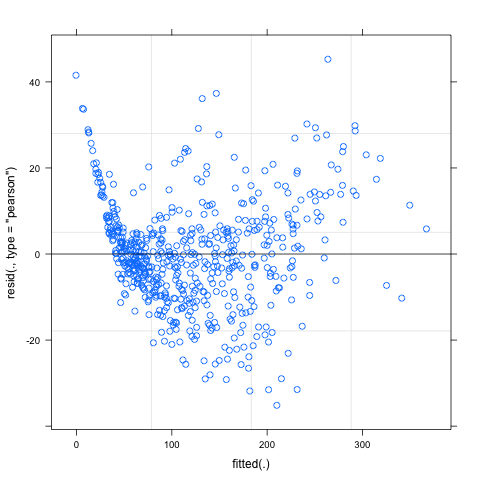

In [43]:
%%R

plot(m)

## Python and statsmodels

https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

https://emredjan.github.io/blog/2017/07/11/emulating-r-plots-in-python/

Think Stats: Exploratory Data Analysis in Python (http://www.greenteapress.com/thinkstats2/html/index.html)

In [44]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp
from statsmodels.graphics.gofplots import ProbPlot

In [45]:
cwit = pd.read_csv('../data/cwit_data.csv')

In [46]:
cwit.describe()

,Stroop_1_R_W3,Stroop_2_R_W3,Stroop_3_R_W3,Stroop_4_R_W3
count,74.000000,74.000000,74.000000,74.000000
mean,29.864865,22.162162,56.986486,69.891892
std,5.437879,4.478341,14.462510,22.006579
min,20.000000,14.000000,35.000000,36.000000
25%,26.250000,19.000000,46.000000,54.000000
50%,30.000000,21.000000,54.500000,64.500000
75%,32.000000,24.000000,62.750000,83.750000
max,52.000000,39.000000,102.000000,136.000000


In [47]:
model_f12 = 'Stroop_3_R_W3 ~ Stroop_1_R_W3 + Stroop_2_R_W3'
model_f2 = 'Stroop_3_R_W3 ~ Stroop_2_R_W3'
model_f1 = 'Stroop_3_R_W3 ~ Stroop_1_R_W3'

model12 = smf.ols(formula=model_f12, data=cwit)
model12_fit = model12.fit()

model2 = smf.ols(formula=model_f2, data=cwit)
model2_fit = model2.fit()

model1 = smf.ols(formula=model_f1, data=cwit)
model1_fit = model1.fit()

**model1: 'Stroop_3_R_W3 ~ Stroop_1_R_W3'**

In [48]:
# Seeing if the overall model is significant
print(f"Overall model F({model1_fit.df_model: .0f},{model1_fit.df_resid: .0f}) = {model1_fit.fvalue: .3f}, p = {model1_fit.f_pvalue: .4f}")

Overall model F( 1, 72) =  31.063, p =  0.0000


In [49]:
from IPython.core.display import HTML
HTML(model1_fit.summary().tables[0].as_html())

Dep. Variable:,Stroop_3_R_W3,R-squared:,0.301
Model:,OLS,Adj. R-squared:,0.292
Method:,Least Squares,F-statistic:,31.06
Date:,"Thu, 07 Mar 2019",Prob (F-statistic):,4.09e-07
Time:,23:52:12,Log-Likelihood:,-288.92
No. Observations:,74,AIC:,581.8
Df Residuals:,72,BIC:,586.5
Df Model:,1,,
Covariance Type:,nonrobust,,


In [50]:
HTML(model1_fit.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,13.3805,7.951,1.683,0.097,-2.469,29.230
Stroop_1_R_W3,1.4601,0.262,5.573,0.000,0.938,1.982


In [51]:
HTML(model1_fit.summary().tables[2].as_html())

Omnibus:,20.450,Durbin-Watson:,1.630
Prob(Omnibus):,0.000,Jarque-Bera (JB):,26.399
Skew:,1.248,Prob(JB):,1.85e-06
Kurtosis:,4.526,Cond. No.,171.


The *Durban-Watson* tests is to detect the presence of autocorrelation, *Jarque-Bera* tests the assumption of normality, *Omnibus* tests the assumption of homogeneity of variance, and the *Condition Number* assess multicollinearity. Condition Number values over 20 are indicative of multicollinearity.

**model2: 'Stroop_3_R_W3 ~ Stroop_2_R_W3'**

In [52]:
# Seeing if the overall model is significant
print(f"Overall model F({model2_fit.df_model: .0f},{model2_fit.df_resid: .0f}) = {model2_fit.fvalue: .3f}, p = {model2_fit.f_pvalue: .4f}")

Overall model F( 1, 72) =  20.746, p =  0.0000


In [53]:
HTML(model2_fit.summary().tables[0].as_html())

Dep. Variable:,Stroop_3_R_W3,R-squared:,0.224
Model:,OLS,Adj. R-squared:,0.213
Method:,Least Squares,F-statistic:,20.75
Date:,"Thu, 07 Mar 2019",Prob (F-statistic):,2.09e-05
Time:,23:52:15,Log-Likelihood:,-292.83
No. Observations:,74,AIC:,589.7
Df Residuals:,72,BIC:,594.3
Df Model:,1,,
Covariance Type:,nonrobust,,


In [54]:
HTML(model2_fit.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,23.1365,7.580,3.052,0.003,8.026,38.247
Stroop_2_R_W3,1.5274,0.335,4.555,0.000,0.859,2.196


In [55]:
HTML(model2_fit.summary().tables[2].as_html())

Omnibus:,4.554,Durbin-Watson:,1.483
Prob(Omnibus):,0.103,Jarque-Bera (JB):,4.399
Skew:,0.594,Prob(JB):,0.111
Kurtosis:,2.876,Cond. No.,115.


**model12: 'Stroop_3_R_W3 ~ Stroop_1_R_W3 + Stroop_2_R_W3'**

In [56]:
# Seeing if the overall model is significant
print(f"Overall model F({model12_fit.df_model: .0f},{model12_fit.df_resid: .0f}) = {model12_fit.fvalue: .3f}, p = {model12_fit.f_pvalue: .4f}")

Overall model F( 2, 71) =  19.118, p =  0.0000


In [57]:
HTML(model12_fit.summary().tables[0].as_html())

Dep. Variable:,Stroop_3_R_W3,R-squared:,0.350
Model:,OLS,Adj. R-squared:,0.332
Method:,Least Squares,F-statistic:,19.12
Date:,"Thu, 07 Mar 2019",Prob (F-statistic):,2.28e-07
Time:,23:52:17,Log-Likelihood:,-286.25
No. Observations:,74,AIC:,578.5
Df Residuals:,71,BIC:,585.4
Df Model:,2,,
Covariance Type:,nonrobust,,


In [58]:
HTML(model12_fit.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,5.5340,8.440,0.656,0.514,-11.295,22.363
Stroop_1_R_W3,1.1051,0.297,3.715,0.000,0.512,1.698
Stroop_2_R_W3,0.8325,0.361,2.305,0.024,0.112,1.553


In [59]:
HTML(model12_fit.summary().tables[2].as_html())

Omnibus:,8.194,Durbin-Watson:,1.596
Prob(Omnibus):,0.017,Jarque-Bera (JB):,7.965
Skew:,0.792,Prob(JB):,0.0186
Kurtosis:,3.270,Cond. No.,232.


**model2: Get an instance of Influence with influence and outlier measures**

In [60]:
infl12 = model12_fit.get_influence()

In [61]:
df_infl12 = infl12.summary_frame()
df_infl12.head()

,dfb_Intercept,dfb_Stroop_1_R_W3,dfb_Stroop_2_R_W3,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.000318,0.096039,-0.093805,0.005760,0.612178,0.044080,0.131458,0.609462,0.130875
1,-0.203563,0.157260,0.058356,0.020978,0.880859,0.075025,0.250868,0.879452,0.250468
2,-0.014324,0.175413,-0.160033,0.016774,0.953319,0.052466,0.224325,0.952699,0.224179
3,-0.066519,0.073546,-0.019259,0.002680,-0.381455,0.052364,-0.089668,-0.379148,-0.089126
4,0.022060,-0.060264,0.038228,0.001583,-0.263081,0.064194,-0.068904,-0.261349,-0.068450


**Anova table for one or more fitted linear models**<br>
Model statistics are given in the order of args. Models must have been fit using the formula api.

Python for Data Science (https://pythonfordatascience.org/anova-2-way-n-way)

There are 3 types of sum of squares that should be considered when conducting an ANOVA, by default Python and R uses Type 2, whereas SAS tends to use Type 3. The differences in the types of sum of squares is out of this page’s scope; but you should research the differences to decide which type you should use for your study.

In [62]:
import statsmodels.api as sm
sm.stats.anova_lm(model2_fit, typ=2)

,sum_sq,df,F,PR(>F)
Stroop_2_R_W3,3415.462156,1.0,20.746005,0.000021
Residual,11853.524331,72.0,NaN,NaN


In [63]:
anov12 = sm.stats.anova_lm(model12_fit, typ=2)
anov12

,sum_sq,df,F,PR(>F)
Stroop_1_R_W3,1929.150751,1.0,13.801345,0.000402
Stroop_2_R_W3,742.542935,1.0,5.312229,0.024104
Residual,9924.373580,71.0,NaN,NaN


i.e. each factor has an independent significant effect on the mean Stroop_3_R_W3

**Calculating effect size**

In [64]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(anov12)

,sum_sq,mean_sq,df,F,PR(>F),eta_sq,omega_sq
Stroop_1_R_W3,1929.150751,1929.150751,1.0,13.801345,0.000402,0.153155,0.140499
Stroop_2_R_W3,742.542935,742.542935,1.0,5.312229,0.024104,0.058950,0.047328
Residual,9924.373580,139.779910,71.0,NaN,NaN,NaN,NaN


$\omega^2$ is a better measure of effect size since it’s unbiased in it’s calculation. It takes into account the degrees of freedom, whereas $\eta^2$ does not. Side note, $\eta^2$ and $R^2$ are the same thing in the ANOVA framework. Each factor, Stroop_1 and Stroop_2, has a small effect on the mean Stroop_3_R_W3 reaction time

**Comparing models**<br>
When you use `anova(lm.1,lm.2,test="Chisq")`, it performs the Chi-square test to compare lm.1 and lm.2 (i.e. it tests whether reduction in the residual sum of squares are statistically significant or not). Note that this makes sense only if lm.1 and lm.2 are nested models.<br>
https://stat.ethz.ch/R-manual/R-patched/library/stats/html/anova.lm.html

In [65]:
from statsmodels.stats.api import anova_lm
table1_12 = anova_lm(model1_fit, model12_fit, test="F")
print(table1_12)

   df_resid           ssr  df_diff     ss_diff         F    Pr(>F)
0      72.0  10666.916514      0.0         NaN       NaN       NaN
1      71.0   9924.373580      1.0  742.542935  5.312229  0.024104


/Users/arvid/anaconda3/envs/lvv-ri/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/arvid/anaconda3/envs/lvv-ri/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/arvid/anaconda3/envs/lvv-ri/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [66]:
table2_12 = anova_lm(model2_fit, model12_fit,  test="F")
print(table2_12)

   df_resid           ssr  df_diff      ss_diff          F    Pr(>F)
0      72.0  11853.524331      0.0          NaN        NaN       NaN
1      71.0   9924.373580      1.0  1929.150751  13.801345  0.000402


In [67]:
model = model12
model_fit = model12_fit

# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

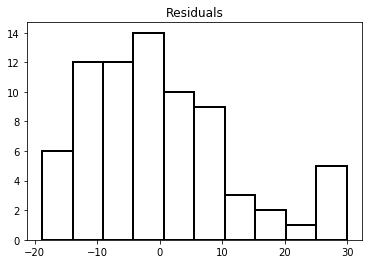

In [68]:
plt.hist(model_residuals, facecolor='w', edgecolor='k', lw=2, alpha=1.0)
plt.title('Residuals')
plt.show()

**Residual plot**

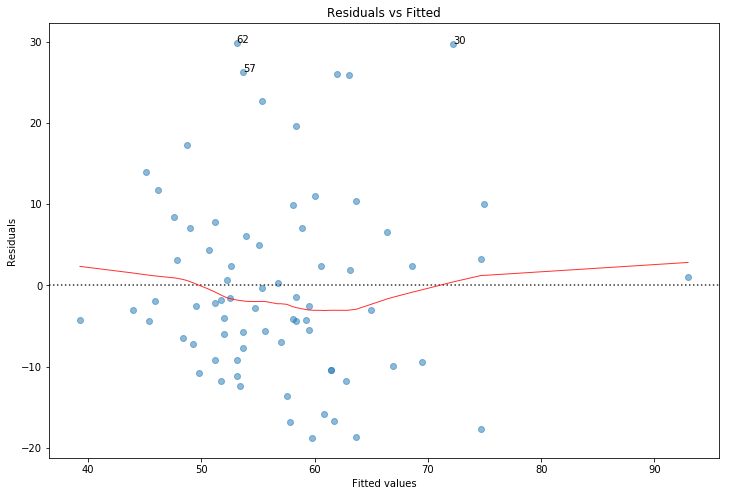

In [69]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'Stroop_3_R_W3', data=cwit, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

**QQ-plot**

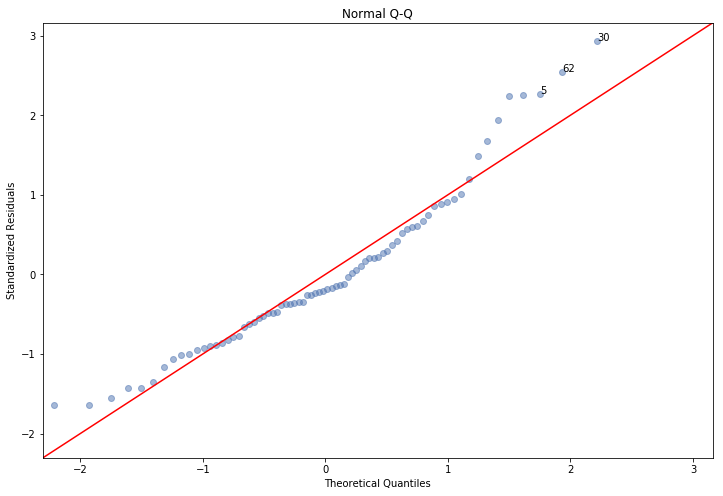

In [70]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

**Scale-location plot**

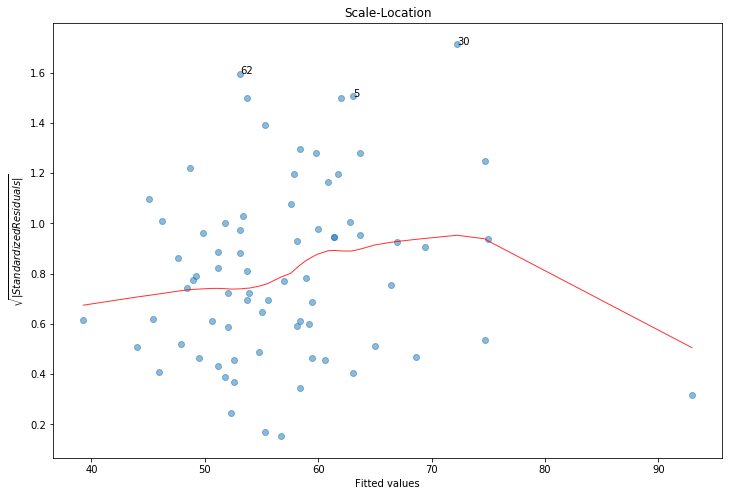

In [71]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

**Leverage plot**

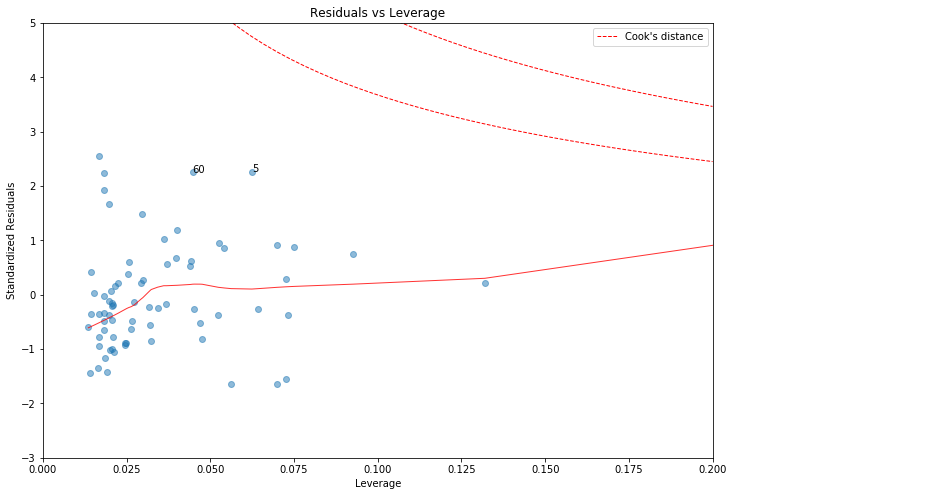

In [72]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

In [73]:
cwit['resid12'] =  np.array(model_residuals)

In [74]:
cwit.head()

,Subject,Sex,Stroop_1_R_W3,Stroop_2_R_W3,Stroop_3_R_W3,Stroop_4_R_W3,resid12
0,subj_01,F,34.0,19.0,66.0,92.0,7.076375
1,subj_02,M,41.0,29.0,85.0,90.0,10.015983
2,subj_03,M,35.0,19.0,71.0,79.0,10.971306
3,subj_04,M,21.0,20.0,41.0,96.0,-4.390219
4,subj_05,M,38.0,21.0,62.0,80.0,-3.008883


In [75]:
cwit_resid12 = pd.DataFrame([cwit['Subject'], cwit['Stroop_3_R_W3'], cwit['resid12']]).T

In [76]:
cwit_resid12.head()

,Subject,Stroop_3_R_W3,resid12
0,subj_01,66,7.07638
1,subj_02,85,10.016
2,subj_03,71,10.9713
3,subj_04,41,-4.39022
4,subj_05,62,-3.00888


In [77]:
#cwit_resid12.to_csv('../results/cwit_resid12.csv', index=False)